In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('datasets/retail_data.csv')

df.head()


,region,product_category,sales_amount,quantity_sold,month
0,East,Clothing,105.33,1,May
1,West,Home,59.94,9,Feb
2,North,Electronics,111.41,1,Mar
3,East,Electronics,118.32,3,Mar
4,East,Electronics,116.79,8,Apr


In [17]:
sales_per_region= df.groupby('region')['sales_amount'].sum()
sales_per_region

region
East     7827.29
North    7862.64
South    6916.63
West     8583.18
Name: sales_amount, dtype: float64

In [22]:
sales_per_product_category= df.groupby('product_category')[['sales_amount']].sum()
sales_per_product_category

,sales_amount
product_category,
Books,5295.19
Clothing,8370.65
Electronics,9217.31
Home,8306.59


In [24]:
sales_per_month=df.groupby('month')[['sales_amount']].sum()
sales_per_month

,sales_amount
month,
Apr,4411.59
Feb,4801.83
Jan,5247.66
Jun,5128.46
Mar,5301.25
May,6298.95


In [25]:
detailed_summary=df.groupby(['region','product_category'])[['sales_amount']].sum()
detailed_summary

sales_amount
region product_category              
East   Books                   963.21
       Clothing               2040.18
       Electronics            2617.60
       Home                   2206.30
North  Books                  1121.29
       Clothing               2273.95
       Electronics            1976.14
       Home                   2491.26
South  Books                  1187.80
       Clothing               1688.35
       Electronics            2074.23
       Home                   1966.25
West   Books                  2022.89
       Clothing               2368.17
       Electronics            2549.34
       Home                   1642.78

In [26]:
def sales_range(x):
    return x.max() - x.min()

In [29]:
custom_aggregation=df.groupby('region')['sales_amount'].agg({'sum','mean', sales_range}).reset_index()
custom_aggregation
                                                            

,region,mean,sum,sales_range
0,East,101.653117,7827.29,141.77
1,North,106.251892,7862.64,123.72
2,South,101.715147,6916.63,125.66
3,West,105.965185,8583.18,150.36


## pivot tables

In [32]:
 pivot_sales= df.pivot_table(
    values='sales_amount',
    index='region',
    columns='product_category',
    aggfunc='sum',
    fill_value=0
)
pivot_sales

product_category,Books,Clothing,Electronics,Home
region,,,,
East,963.21,2040.18,2617.60,2206.30
North,1121.29,2273.95,1976.14,2491.26
South,1187.80,1688.35,2074.23,1966.25
West,2022.89,2368.17,2549.34,1642.78


In [33]:
quantity_sold_pivot= df.pivot_table(
    values='quantity_sold',
    index='region',
    columns='product_category',
    aggfunc='count',
    fill_value=0
)
quantity_sold_pivot

product_category,Books,Clothing,Electronics,Home
region,,,,
East,11,22,24,20
North,11,23,18,22
South,13,16,21,18
West,19,21,24,17


### ranking and sorting

In [35]:
# top regions per sales
top_sales_per_region=df.groupby('region')[['sales_amount']].sum().sort_values('sales_amount',ascending=False)
top_sales_per_region

,sales_amount
region,
West,8583.18
North,7862.64
East,7827.29
South,6916.63


In [37]:
# top categories by sales 
top_categories=df.groupby('product_category')[['sales_amount']].sum().sort_values('sales_amount',ascending=False)
top_categories 

,sales_amount
product_category,
Electronics,9217.31
Clothing,8370.65
Home,8306.59
Books,5295.19


In [40]:
# top 3 categories by average sales
top_3_categories_by_average_sales=df.groupby('month')['sales_amount'].mean().nlargest(3)
top_3_categories_by_average_sales

month
May    106.761864
Mar    106.025000
Apr    105.037857
Name: sales_amount, dtype: float64

### Practice Exercises - Part A


In [65]:
# 1. Total quantity sold by region
total_quantity_sold_by_region=df.groupby('region')['quantity_sold'].sum()
total_quantity_sold_by_region


region
East     319
North    360
South    348
West     392
Name: quantity_sold, dtype: int64

In [69]:
# 2. Average sales amount by category
average_sales_amount_by_category=df.groupby('product_category')['sales_amount'].mean()
average_sales_amount_by_category

product_category
Books           98.059074
Clothing       102.081098
Electronics    105.946092
Home           107.877792
Name: sales_amount, dtype: float64

In [70]:
# 3. Count of transactions by month
Count_of_transactions_by_month=df.groupby('month')['sales_amount'].count()
Count_of_transactions_by_month

month
Apr    42
Feb    48
Jan    52
Jun    49
Mar    50
May    59
Name: sales_amount, dtype: int64

In [74]:
# Create a pivot table showing:
# - Rows: region
# - Columns: month
# - Values: total sales_amount
# - Add a row for totals

pivot_table=df.pivot_table(
    index='region',
    columns='month',
    values='sales_amount',
    aggfunc='sum',
    fill_value=0
)
pivot_table.loc['Total']=pivot_table.sum()
pivot_table

month,Apr,Feb,Jan,Jun,Mar,May
region,,,,,,
East,1063.22,1511.30,1380.58,577.62,1523.03,1771.54
North,1224.38,1133.47,1379.43,1378.15,983.36,1763.85
South,795.90,1152.31,1136.58,1115.71,832.56,1883.57
West,1328.09,1004.75,1351.07,2056.98,1962.30,879.99
Total,4411.59,4801.83,5247.66,5128.46,5301.25,6298.95


In [80]:
# Find the top 2 region-category combinations by total sales
top_2_region_category_by_total_sales=df.groupby(['region','product_category'])['sales_amount'].nlargest(2)
top_2_region_category_by_total_sales

region  product_category     
East    Books             181    139.87
                          183    121.27
        Clothing          255    147.22
                          41     142.28
        Electronics       151    156.43
                          187    154.03
        Home              100    175.81
                          244    151.83
North   Books             185    143.20
                          6      125.02
        Clothing          287    134.82
                          15     131.59
        Electronics       82     146.43
                          298    145.02
        Home              67     173.66
                          243    164.27
South   Books             105    155.40
                          294    129.89
        Clothing          89     160.31
                          95     153.84
        Electronics       164    155.40
                          282    134.46
        Home              42     168.97
                          230    139.52
West    Bo

# Part B: Visualizing Data with Matplotlib & Seaborn

### Line Plots: Perfect for Trends Over Time

<function matplotlib.pyplot.show(close=None, block=None)>

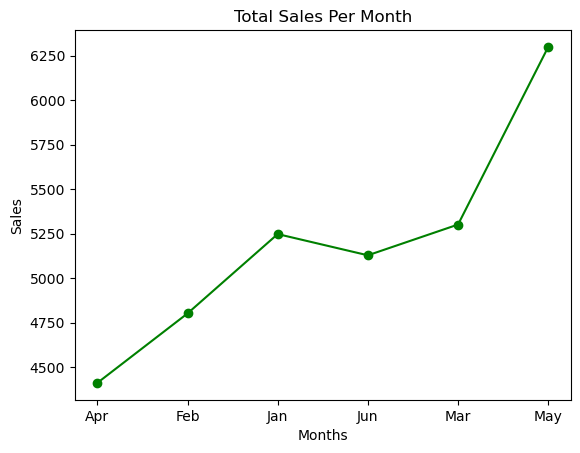

<Figure size 1000x600 with 0 Axes>

In [50]:
sales_per_month=df.groupby('month')['sales_amount'].sum()
plt.plot(sales_per_month.index,sales_per_month.values,color='green',marker='o')
plt.title('Total Sales Per Month')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.figure(figsize=(10,6))
plt.show

## Bar chart

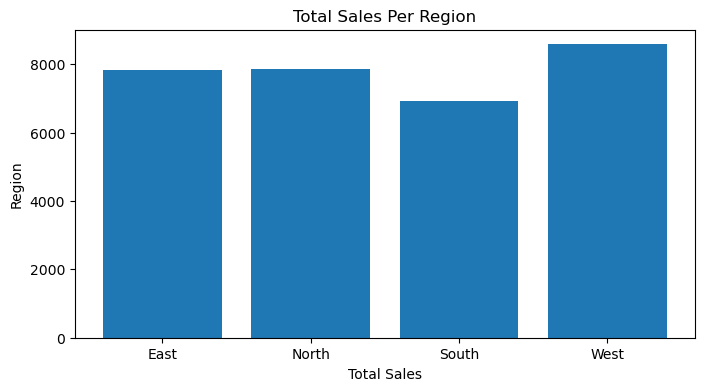

In [56]:
sales_per_region=df.groupby('region')['sales_amount'].sum()
plt.figure(figsize=(8,4))
plt.bar(sales_per_region.index,sales_per_region.values)
plt.title('Total Sales Per Region')
plt.ylabel('Region')
plt.xlabel('Total Sales')
plt.show()

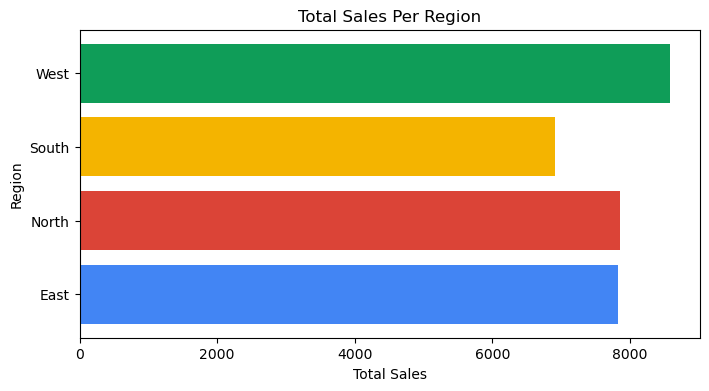

In [68]:
sales_per_region=df.groupby('region')['sales_amount'].sum()
plt.figure(figsize=(8,4))
plt.barh(sales_per_region.index,sales_per_region.values,color=[ '#4285F4', '#DB4437', '#F4B400', '#0F9D58'])
plt.title('Total Sales Per Region')
plt.ylabel('Region')
plt.xlabel('Total Sales')
plt.show()

In [ ]:
sales_per_region=df.groupby('region')['sales_amount'].sum()
plt.figure(figsize=(8,4))
plt.bar(sales_per_region.index,sales_per_region.values)
plt.title('Total Sales Per Region')
plt.ylabel('Region')
plt.xlabel('Total Sales')
plt.show()